In [5]:
# pandas is a libary its help for data in order 
import pandas as pd

In [6]:
# read csv function is get the current file
dataSet = pd.read_csv('insurance_pre.csv')

In [7]:
# get dummies function is convert the categorical data into numerical data
dataSet = pd.get_dummies(dataSet)

In [8]:
# head function is show the first five data's
dataSet.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0


In [9]:
# info function is show the data is what type
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age           1338 non-null int64
bmi           1338 non-null float64
children      1338 non-null int64
charges       1338 non-null float64
sex_female    1338 non-null uint8
sex_male      1338 non-null uint8
smoker_no     1338 non-null uint8
smoker_yes    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(4)
memory usage: 47.2 KB


In [15]:
# describe function is calculate  
dataSet.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [16]:
# element is present or not
dataSet.isnull().sum()

age           0
bmi           0
children      0
charges       0
sex_female    0
sex_male      0
smoker_no     0
smoker_yes    0
dtype: int64

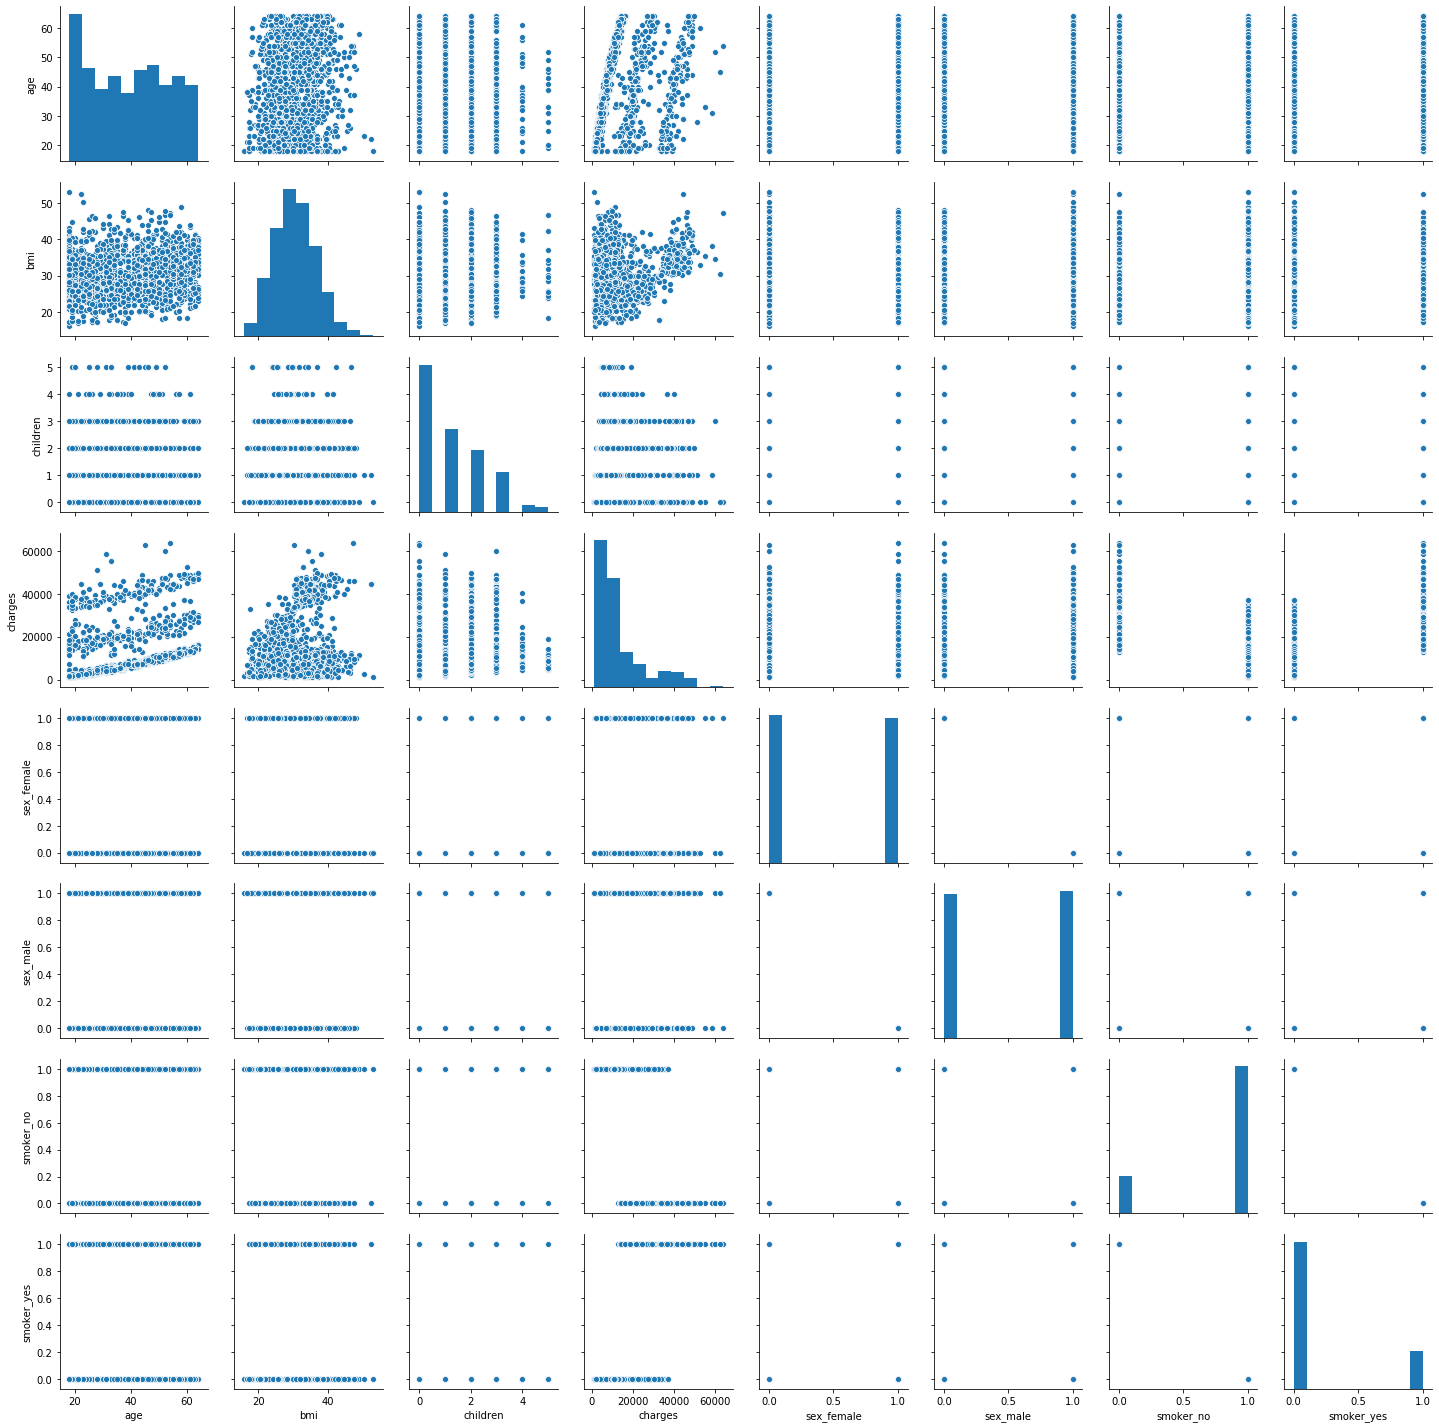

In [11]:
# visulation  all the datas
import seaborn as sns
sns.pairplot(dataSet)

Text(0, 0.5, 'charges')

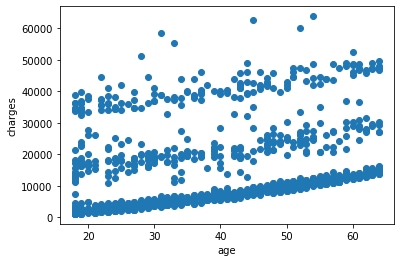

In [68]:
import matplotlib.pyplot as plt
plt.scatter(dataSet['age'],dataSet['charges'])
plt.xlabel('age')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

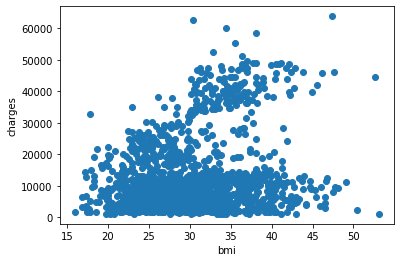

In [18]:
plt.scatter(dataSet['bmi'],dataSet['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

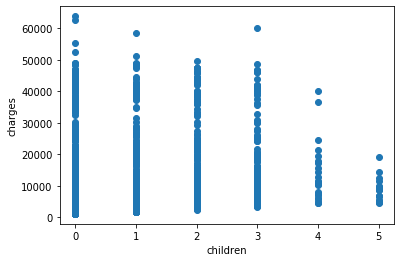

In [19]:
plt.scatter(dataSet['children'],dataSet['charges'])
plt.xlabel('children')
plt.ylabel('charges')

In [20]:
# split the input and output
independent = dataSet[['age', 'bmi', 'children','sex_female', 'sex_male','smoker_no', 'smoker_yes']]
dependent = dataSet[['charges']]

In [69]:
# split the train and test 
# its randomly choose for test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [70]:
# standardization the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [79]:
# asign all the modle in object
models={
    'Multiple Linear Regression':LinearRegression(n_jobs = -1),
    'seprate vector Regression':SVR(C= 1000, coef0= 3, degree= 6, gamma= 'scale', kernel= 'poly',cache_size= 200,epsilon= 0.5),
    'Decision tree':DecisionTreeRegressor(
        splitter= 'best', 
        min_samples_split= 2, 
        min_samples_leaf= 7, 
        min_impurity_decrease= 0.4, 
        max_leaf_nodes= 80, 
        max_features= 'auto', 
        max_depth= 10, 
        criterion= 'mae'),
    
    'Random forest':RandomForestRegressor(
        n_jobs= -1, 
        n_estimators= 200, 
        min_samples_split= 8, 
        min_samples_leaf= 8, 
        min_impurity_decrease= 0.1, 
        max_features= 'auto', 
        max_depth= 5, 
        criterion= 'mse')
    
}


sklearn.ensemble.forest.RandomForestRegressor

In [73]:
# its one by one algorithm create the model and print the model perforamce for training set
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    #make prediction
    y_pred = model.predict(x_test)
    
    #Training set preformance
    r2Score = r2_score(y_test,y_pred)
    
    #print the order 
    print( list(models.keys())[i])
    
    print('Model perforamce for training set')
    
    print("r2 score :{:.4f}".format(r2Score))
    
    print('='*35)
    print('\n')  

Multiple Linear Regression
Model perforamce for training set
r2 score :0.7895




C:\Users\REVANTH KUMAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


seprate vector Regression
Model perforamce for training set
r2 score :0.8691


Decision tree
Model perforamce for training set
r2 score :0.8872




C:\Users\REVANTH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random forest
Model perforamce for training set
r2 score :0.8922




# Higest model accurancy is Random forest [0.8922]

In [80]:
regressor = RandomForestRegressor(n_jobs= -1, n_estimators= 200, min_samples_split= 8, min_samples_leaf= 8, min_impurity_decrease= 0.1, max_features= 'auto', max_depth= 5, criterion= 'mse')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
r2Score = r2_score(y_test,y_pred)
print('r2 Score:{:.4f}'.format(r2Score))

C:\Users\REVANTH KUMAR\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2 Score:0.8922


In [81]:
import pickle
fileName = "final_ChargesInsurance.sav"
pickle.dump(regressor,open(fileName,'wb'))

In [82]:
loadModel = pickle.load(open(fileName,'rb'))
result = loadModel.predict([[45,55,5,1,0,0,1]])
result

array([31478.0349381])